In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")

refine_param = {
    "removeDuplication":{"flag":True},
    "staticFrequency":{"flag":True}
}
outlier_param  = {
    "certainErrorToNaN":{"flag":True},
    "unCertainErrorToNaN":{
        "flag":True,
        "param":{"neighbor":[0.6,0.6]}
    },
    "data_type":"air"
}
imputation_param = {
    "serialImputation":{
        "flag":True,
        "imputation_method":[{"min":0,"max":2,"method":"linear"}, {"min":3,"max":6,"method":"KNN"}],
        "totalNanLimit":90
    }
}

process_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}

In [2]:
from KETIPreDataIngestion.KETI_setting import influx_setting_KETI as ins
from KETIPreDataIngestion.data_influx import influx_Client
db_client = influx_Client.influxClient(ins.CLUSTDataServer)
db_list = db_client.get_DBList()

In [3]:
db_name = 'air_indoor_경로당'
ms_name = 'ICL1L2000235'
feature_name = 'in_cici_co2'
data_num ="2000"

input_test_data = db_client.get_datafront_by_num(data_num, db_name, ms_name)[[feature_name]]
from KETIPrePartialDataPreprocessing import data_preprocessing

partialP = data_preprocessing.packagedPartialProcessing(process_param)
output = partialP.allPartialProcessing(input_test_data[:20000])

in_cici_co2
getDataWithCertainNaN
SerialImputation
NaN Ratio: in_cici_co2 24.2 %
linear
KNN


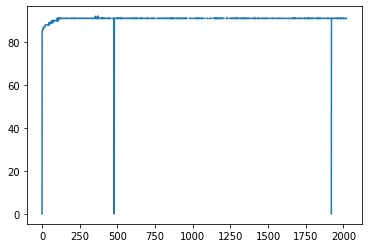

In [4]:
x = output['refined_data'].values.flatten()
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()

key:  original Data Leangth: 1536 Data NaN Length: in_cici_co2    0
dtype: int64
                           in_cici_co2
time                                  
2021-02-04 09:14:00+00:00          0.0
2021-02-04 09:15:00+00:00         85.0
2021-02-04 09:16:00+00:00         85.0
2021-02-04 09:17:00+00:00         85.0
2021-02-04 09:18:00+00:00         86.0
...                                ...
2021-02-05 18:50:00+00:00         91.0
2021-02-05 18:51:00+00:00         91.0
2021-02-05 18:52:00+00:00         91.0
2021-02-05 18:53:00+00:00         91.0
2021-02-05 18:54:00+00:00         91.0

[1536 rows x 1 columns]


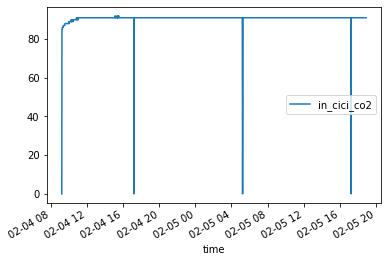

key:  refined_data Data Leangth: 2021 Data NaN Length: in_cici_co2    485
dtype: int64
                           in_cici_co2
time                                  
2021-02-04 09:14:00+00:00          0.0
2021-02-04 09:15:00+00:00         85.0
2021-02-04 09:16:00+00:00         85.0
2021-02-04 09:17:00+00:00         85.0
2021-02-04 09:18:00+00:00         86.0
...                                ...
2021-02-05 18:50:00+00:00         91.0
2021-02-05 18:51:00+00:00         91.0
2021-02-05 18:52:00+00:00         91.0
2021-02-05 18:53:00+00:00         91.0
2021-02-05 18:54:00+00:00         91.0

[2021 rows x 1 columns]


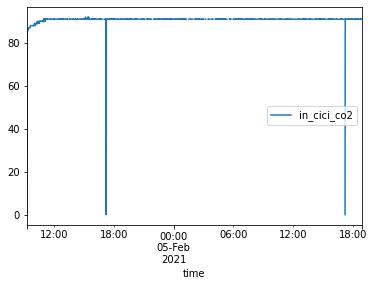

key:  datawithMoreCertainNaN Data Leangth: 2021 Data NaN Length: in_cici_co2    489
dtype: int64
                           in_cici_co2
time                                  
2021-02-04 09:14:00+00:00          NaN
2021-02-04 09:15:00+00:00         85.0
2021-02-04 09:16:00+00:00         85.0
2021-02-04 09:17:00+00:00         85.0
2021-02-04 09:18:00+00:00         86.0
...                                ...
2021-02-05 18:50:00+00:00         91.0
2021-02-05 18:51:00+00:00         91.0
2021-02-05 18:52:00+00:00         91.0
2021-02-05 18:53:00+00:00         91.0
2021-02-05 18:54:00+00:00         91.0

[2021 rows x 1 columns]


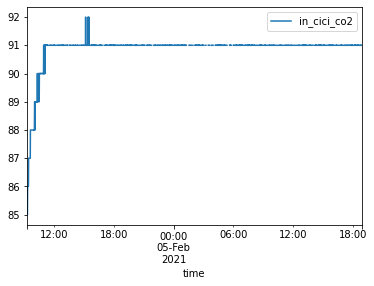

key:  datawithMoreUnCertainNaN Data Leangth: 2021 Data NaN Length: in_cici_co2    489
dtype: int64
                           in_cici_co2
time                                  
2021-02-04 09:14:00+00:00          NaN
2021-02-04 09:15:00+00:00         85.0
2021-02-04 09:16:00+00:00         85.0
2021-02-04 09:17:00+00:00         85.0
2021-02-04 09:18:00+00:00         86.0
...                                ...
2021-02-05 18:50:00+00:00         91.0
2021-02-05 18:51:00+00:00         91.0
2021-02-05 18:52:00+00:00         91.0
2021-02-05 18:53:00+00:00         91.0
2021-02-05 18:54:00+00:00         91.0

[2021 rows x 1 columns]


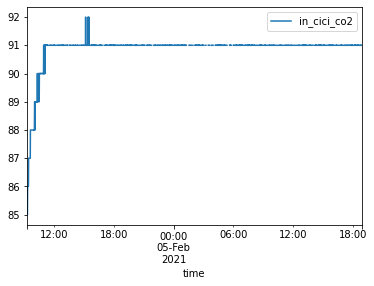

key:  imputed_data Data Leangth: 2021 Data NaN Length: in_cici_co2    5
dtype: int64
                           in_cici_co2
time                                  
2021-02-04 09:14:00+00:00         85.0
2021-02-04 09:15:00+00:00         85.0
2021-02-04 09:16:00+00:00         85.0
2021-02-04 09:17:00+00:00         85.0
2021-02-04 09:18:00+00:00         86.0
...                                ...
2021-02-05 18:50:00+00:00         91.0
2021-02-05 18:51:00+00:00         91.0
2021-02-05 18:52:00+00:00         91.0
2021-02-05 18:53:00+00:00         91.0
2021-02-05 18:54:00+00:00         91.0

[2021 rows x 1 columns]


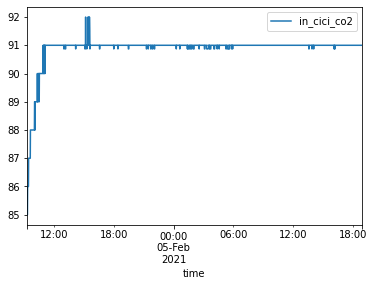

In [5]:
# Check each result
import matplotlib.pyplot as plt
for key in output:
    temp = output[key]
    print("key: ", key, "Data Leangth:", len(temp), "Data NaN Length:", temp.isna().sum())
    print(temp)
    temp.plot()
    plt.show()